In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('C:/Users/ivanr/Downloads/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data = data.drop('Name', axis=1)

In [7]:
data = data.drop('PassengerId', axis=1)

In [8]:
data.columns = list(map( lambda x: x.lower(), data.columns))

In [9]:
data.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [16]:
data['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [18]:
data.isna().sum()/len(data)*100

survived     0.000000
pclass       0.000000
sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin       77.104377
embarked     0.224467
dtype: float64

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


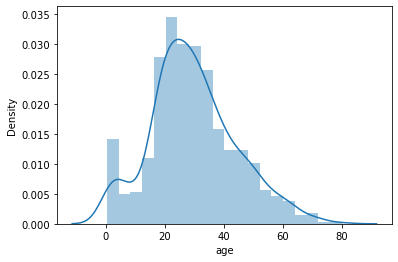

In [20]:
sns.distplot(data['age'])
plt.show()

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

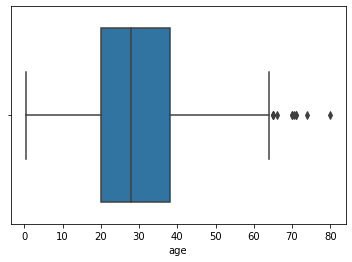

In [21]:
sns.boxplot(data['age'])

In [22]:
temp_age = data[data['age'].isna() == False]['age']

In [24]:
median_age = np.median(temp_age)

In [25]:
data['age'] = data['age'].fillna(median_age)

In [26]:
data.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [28]:
data['cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: cabin, Length: 147, dtype: int64

In [31]:
def clean_cabin(x):
    if pd.isna(x):
        return np.nan
    else:
        return x[0]

In [32]:
data['cabin'] = list(map(clean_cabin, data['cabin']))

In [33]:
data['cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin, dtype: int64

In [35]:
def group_cabin(x):
    if x == 'T':
        return 'F'
    elif x == 'G':
        return 'F'
    else:
        return x

In [36]:
data['cabin'] = list(map(group_cabin, data['cabin']))

In [37]:
data['cabin'].value_counts()

C    59
B    47
D    33
E    32
F    18
A    15
Name: cabin, dtype: int64

In [38]:
data['cabin'] = data['cabin'].fillna('C')

In [41]:
data['cabin'].isna().sum()

0

In [42]:
data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [43]:
data['embarked'] = data['embarked'].fillna('S')

In [45]:
data.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

In [46]:
data.dtypes

survived     object
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [47]:
data.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,C,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,1,1,female,35.0,1,0,113803,53.1000,C,S
4,0,3,male,35.0,0,0,373450,8.0500,C,S


In [52]:
data['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [53]:
data['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [54]:
data['parch'] = list(map(lambda x: str(x), data['parch']))


In [55]:
def clean_parch(x):
    if x in ['3', '4', '5', '6']:
        return '2'
    else:
        return x

In [56]:
data['parch'] = list(map(clean_parch, data['parch']))

In [60]:
data['parch'].value_counts()

0    678
1    118
2     95
Name: parch, dtype: int64

In [ ]:
data = data.drop('ticket', axis = 1)

In [62]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,C,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,C,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,C,S


In [63]:
data['pclass'] = data['pclass'].astype('object')

In [65]:
nums = data[['age', 'sibsp', 'fare']]

In [66]:
corr_matrix = nums.corr()

<AxesSubplot:>

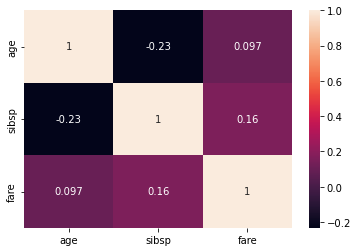

In [67]:
sns.heatmap(corr_matrix, annot = True)

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

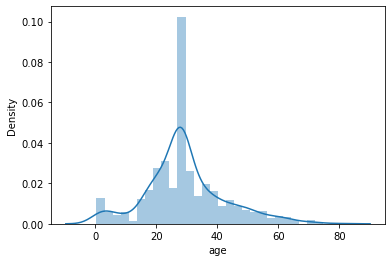

In [68]:
sns.distplot(data['age'])

In [69]:
min(data['age'])

0.42

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

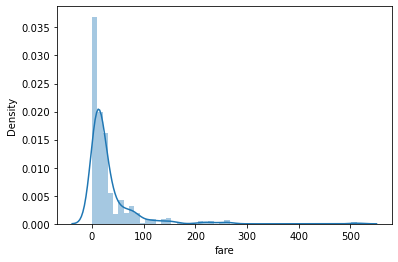

In [70]:
sns.distplot(data['fare'])

In [71]:
crt_fare = list(map(lambda x: x**0.333, data['fare']))

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

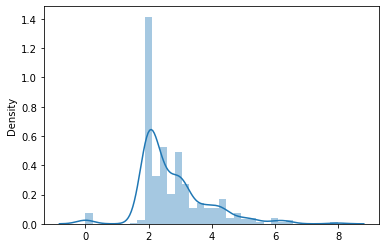

In [72]:
sns.distplot(crt_fare)

In [73]:
def log_tranform(x):
    if x<=0:
        return 0
    else:
        return np.log(x)

In [74]:
log_fare = list(map(log_tranform, data['fare']))

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

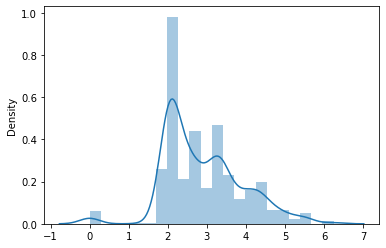

In [76]:
sns.distplot(log_fare)

In [77]:
data['fare'] = log_fare

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

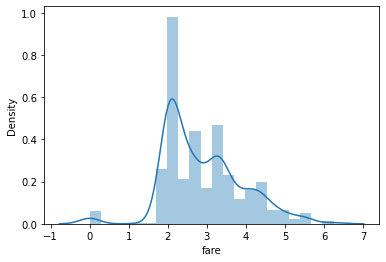

In [78]:
sns.distplot(data['fare'])

In [79]:
pd.crosstab(data['sex'], data['survived'])

survived,0,1
sex,,
female,81,233
male,468,109


In [81]:
y = data['survived']
x = data.drop('survived', axis=1)

In [82]:
numericals= x[['age', 'sibsp', 'fare']]

In [83]:
categoricals = x[['pclass', 'sex', 'parch', 'cabin', 'embarked']]

In [84]:
scaled = Normalizer().fit_transform(numericals)
scaled = pd.DataFrame(scaled)

In [85]:
scaled

,0,1,2
0,0.994951,0.045225,0.089591
1,0.993416,0.026143,0.111541
2,0.996846,0.000000,0.079365
3,0.993221,0.028378,0.112721
4,0.998229,0.000000,0.059485
...,...,...,...
886,0.995518,0.000000,0.094572
887,0.984353,0.000000,0.176209
888,0.993087,0.035467,0.111895
889,0.991552,0.000000,0.129710


In [86]:
encoded = OneHotEncoder(drop='first').fit_transform(categoricals).toarray()
encoded = pd.DataFrame(encoded)
encoded

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [87]:
features = pd.concat([scaled, encoded], axis = 1)
features

,0,1,2,0,1,2,3,4,5,6,7,8,9,10,11
0,0.994951,0.045225,0.089591,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.993416,0.026143,0.111541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.996846,0.000000,0.079365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.993221,0.028378,0.112721,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.998229,0.000000,0.059485,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.995518,0.000000,0.094572,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,0.984353,0.000000,0.176209,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.993087,0.035467,0.111895,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,0.991552,0.000000,0.129710,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.1, random_state=40)

In [90]:
model = LogisticRegression(multi_class='ovr').fit(X_train, y_train)

In [91]:
predictions = model.predict(X_test)

In [92]:
accuracy_score(y_test, predictions)

0.8